In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.0047 - accuracy: 0.6875 - val_loss: 1.1453 - val_accuracy: 0.6250
Epoch 2/30
1/1 [==============================] - 0s 53ms/step - loss: 0.9909 - accuracy: 0.6875 - val_loss: 1.1305 - val_accuracy: 0.6250
Epoch 3/30
1/1 [==============================] - 0s 43ms/step - loss: 0.9771 - accuracy: 0.6875 - val_loss: 1.1160 - val_accuracy: 0.6250
Epoch 4/30
1/1 [==============================] - 0s 41ms/step - loss: 0.9634 - accuracy: 0.6875 - val_loss: 1.1016 - val_accuracy: 0.6250
Epoch 5/30
1/1 [==============================] - 0s 52ms/step - loss: 0.9499 - accuracy: 0.6875 - val_loss: 1.0875 - val_accuracy: 0.6250
Epoch 6/30
1/1 [==============================] - 0s 46ms/step - loss: 0.9367 - accuracy: 0.6875 - val_loss: 1.0736 - val_accuracy: 0.6250
Epoch 7/30
1/1 [==============================] - 0s 44ms/step - loss: 0.9246 - accuracy: 0.6875 - val_loss: 1.0599 - val_accuracy: 0.6250
Epoch 8/30
1/1 [=============

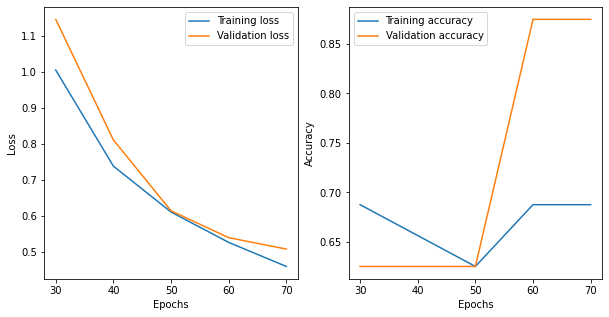

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("REDO-DATA.xlsx")

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode categorical variables
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float32)

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=data.iloc[:,-1])

# Define model
model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# set the range of epochs to try
num_epochs = range(30, 71, 10)

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in num_epochs:
    # train the model for one epoch with a validation split of 20%
    history = model.fit(X_train, y_train, epochs=epoch, validation_split=0.2)
    
    # record the training and validation losses and accuracies for this epoch
    train_losses.append(history.history['loss'][0])
    val_losses.append(history.history['val_loss'][0])
    train_accs.append(history.history['accuracy'][0])
    val_accs.append(history.history['val_accuracy'][0])
    
    # print the difference between the training and validation losses and accuracies
    print("Epoch:", epoch, "Training Loss:", history.history['loss'][0], "Validation Loss:", history.history['val_loss'][0],
          "Training Accuracy:", history.history['accuracy'][0], "Validation Accuracy:", history.history['val_accuracy'][0])
    
# plot the training and validation losses and accuracies for each epoch
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(num_epochs, train_losses, label='Training loss')
ax[0].plot(num_epochs, val_losses, label='Validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(num_epochs, train_accs, label='Training accuracy')
ax[1].plot(num_epochs, val_accs, label='Validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

In [1]:
#KMEANS

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


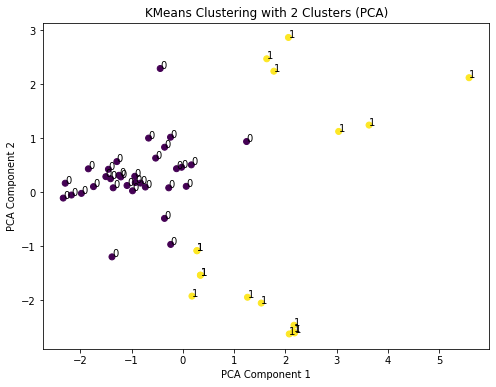

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


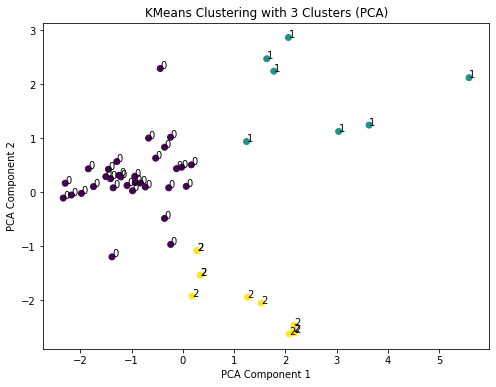

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


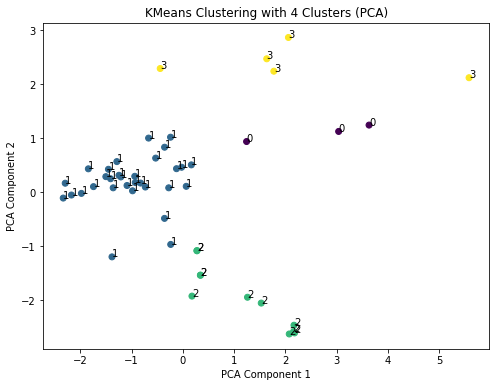

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


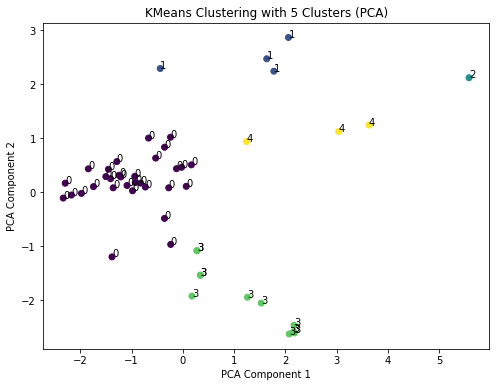

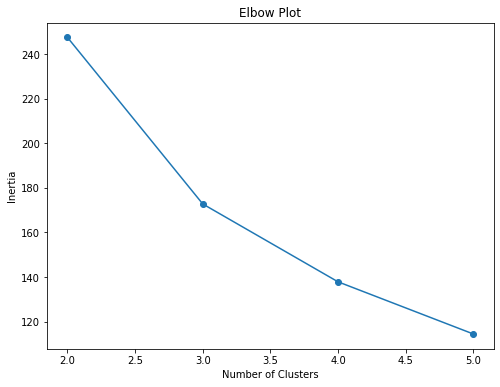

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_excel("REDO-DATA.xlsx")

# Select the features to cluster on
features = ['gc_valve', 'check_valve', 'fm_di', 'gate_valve', 'globe_valve', 'plano_dcs', 'three_way']

# Normalize the features
df[features] = (df[features] - df[features].mean()) / df[features].std()

# Specify the range of cluster numbers to iterate over
cluster_range = range(2, 6)
inertia_values = []

# Iterate over the range of cluster numbers
for num_clusters in cluster_range:

    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=num_clusters)

    # Fit the KMeans model on the normalized data
    kmeans.fit(df[features])

    # Get the cluster assignments for each data point
    clusters = kmeans.predict(df[features])

    # Add the cluster assignments to the original dataframe
    df['cluster'] = clusters

    # Calculate the inertia (sum of squared distances of samples to their closest cluster center)
    inertia_values.append(kmeans.inertia_)

    # Project the data onto a two-dimensional space using PCA
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(df[features])

    # Add the PCA features to the original dataframe
    df['pca1'] = pca_features[:, 0]
    df['pca2'] = pca_features[:, 1]

    # Generate a scatterplot of the data with color-coded clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='viridis')
    
    # Add annotations to label the clusters
    for i, row in df.iterrows():
        plt.annotate(row['cluster'], (row['pca1'], row['pca2']), fontsize=10, color='black')
    
    plt.title(f"KMeans Clustering with {num_clusters} Clusters (PCA)")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


# Plot the elbow plot to show the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()


In [18]:
print(pca.components_)

[[ 0.34691037  0.29759287  0.55831667  0.20854887  0.31293587  0.5500314
   0.18819708]
 [ 0.44809659 -0.42875002  0.07336345  0.3703424  -0.55260364 -0.08788929
   0.39968971]]


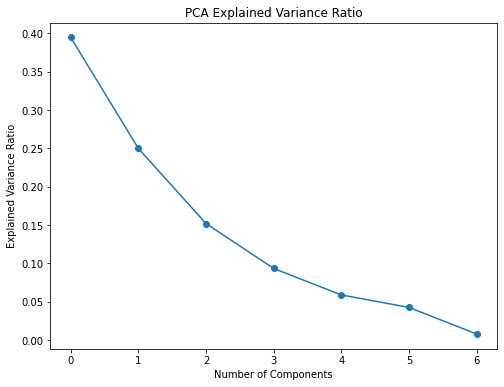

In [16]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_excel("REDO-DATA.xlsx")

# Select the features to cluster on
features = ['gc_valve', 'check_valve', 'fm_di', 'gate_valve', 'globe_valve', 'plano_dcs', 'three_way']

# Normalize the features
df[features] = (df[features] - df[features].mean()) / df[features].std()

# Initialize PCA
pca = PCA()

# Fit and transform the data
pca.fit_transform(df[features])

# Plot the explained variance ratio for each component
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()
